In [1]:
import csv
import sys
sys.path.insert(0, "../python/")

import collections

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as pp
from scipy.stats import chisquare
import os
import re
import fnmatch
import pandas as pd

from particle import particle
from physics import em_physics
from cylinder import cylinder 
from analysis import analysis 

In [28]:
#df_vrt = pd.read_csv('../mcdata/reference files/Reference10000000.csv', names=['#', 'nscatters', 'w', 'de', 'x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'de1', 'x2','y2','z2', 'de2', 'x3', 'y3', 'z3', 'de3', 'x4', 'y4', 'z4', 'de4'],error_bad_lines=False)
df_nonvrt = pd.read_csv('../mcdata/reference files/reference_nonvrt10000001.csv', names=['#', 'nscatters', 'w', 'de', 'x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'de1', 'x2','y2','z2', 'de2', 'x3', 'y3', 'z3', 'de3', 'x4', 'y4', 'z4', 'de4'],error_bad_lines=False)
df_vrt_largefid = pd.read_csv('../mcdata/reference files/reference_largefiducial10000002.csv', names=['#', 'nscatters', 'w', 'de', 'x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'de1', 'x2','y2','z2', 'de2', 'x3', 'y3', 'z3', 'de3', 'x4', 'y4', 'z4', 'de4'],error_bad_lines=False)


#df_vrt.insert(10, 'r2_1', df_vrt['x1']**2 + df_vrt['y1']**2)
df_nonvrt.insert(10, 'r2_1', df_nonvrt['x1']**2 + df_nonvrt['y1']**2)
df_vrt_largefid.insert(10, 'r2_1', df_vrt_largefid['x1']**2 + df_vrt_largefid['y1']**2)

In [45]:
scatter_cut=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<4096)&(np.abs(df_nonvrt['z1'])<74)&(df_nonvrt['de']<2500))
scatter_cut_vrt=((df_vrt_largefid['nscatters']==1)&(df_vrt_largefid['r2_1']<4096)&(np.abs(df_vrt_largefid['z1'])<74))

df_nonvrt_cut=df_nonvrt[scatter_cut]
df_vrt_cut=df_vrt_largefid[scatter_cut_vrt]

In [46]:
df_nonvrt_cut.shape

(642522, 24)

1


Text(0, 0.5, 'Counts / 25.0 kev')

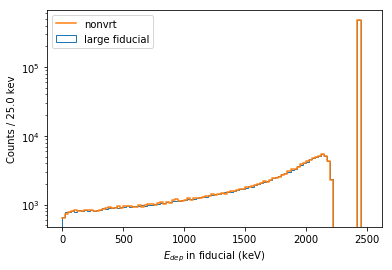

In [47]:
nb=100
#plotarray_vrt=plt.hist(df_vrt['de1'],weights=df_vrt['w'],bins=nb,histtype='step')
plotarray_nonvrt=plt.hist(df_nonvrt_cut['de1'],weights=df_nonvrt_cut['w'],bins=nb,range=(0,2500),histtype='step')
plt.clf()

#plot large vid vrt
plotarray_largefid=plt.hist(df_vrt_cut['de1'],weights=df_vrt_cut['w'],bins=nb,range=(0,2500),histtype='step')

#calculate scaling
#scaling=sum(plotarray_largefid[0])/sum(plotarray_nonvrt[0])
scaling=1


print(scaling)

#scale nonvrt hist
ref=plotarray_nonvrt[0]*scaling
y=np.append(ref,0)
plt.plot(plotarray_nonvrt[1],y,drawstyle='steps-post')


plt.yscale('log')
plt.legend(('nonvrt','large fiducial'),loc='upper left')

plt.xlabel('$E_{dep}$ in fiducial (keV)')
plt.ylabel('Counts / '+str(round(plotarray_largefid[1][-1])/nb)+' kev')

In [55]:
total_nonvrt=sum(plotarray_nonvrt[0])
total_vrt=sum(plotarray_largefid[0])


print('total weight non vrt = '+str(total_nonvrt))
print('total weight large fiducial= '+str(total_vrt))
print(total_vrt-total_nonvrt)

total weight non vrt = 642522.0
total weight large fiducial= 643089.8881210526
567.8881210526451


In [54]:
masked_ref=np.ma.masked_where(ref==0, ref)

chi2_nmc=chisquare(plotarray_largefid[0],f_exp=masked_ref)[0]/masked_ref.count()

#print('number of events 10^(',np.log10(nevents),') & scatter ',nscatter)
#print('chi2 of fast mc',chi2_fmc)
print('chi2 of normal mc',chi2_nmc)
#print('total of fast mc:',sum(fastMC[0]),'total of normal mc:',sum(normalMC[0]),'and ref total',sum(ref))

chi2 of normal mc 1.1577932155508848


## with normal fiducial vol##

In [58]:
df_vrt = pd.read_csv('../mcdata/reference files/Reference10000000.csv', names=['#', 'nscatters', 'w', 'de', 'x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'de1', 'x2','y2','z2', 'de2', 'x3', 'y3', 'z3', 'de3', 'x4', 'y4', 'z4', 'de4'],error_bad_lines=False)
df_nonvrt = pd.read_csv('../mcdata/reference files/reference_nonvrt10000001.csv', names=['#', 'nscatters', 'w', 'de', 'x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'de1', 'x2','y2','z2', 'de2', 'x3', 'y3', 'z3', 'de3', 'x4', 'y4', 'z4', 'de4'],error_bad_lines=False)


In [59]:
df_vrt.insert(10, 'r2_1', df_vrt['x1']**2 + df_vrt['y1']**2)
df_nonvrt.insert(10, 'r2_1', df_nonvrt['x1']**2 + df_nonvrt['y1']**2)

In [60]:
scatter_cut=((df_nonvrt['nscatters']==1)&(df_nonvrt['r2_1']<3249)&(np.abs(df_nonvrt['z1'])<67))
df_nonvrt_cut=df_nonvrt[scatter_cut]


Text(0, 0.5, 'Counts / 25.0 kev')

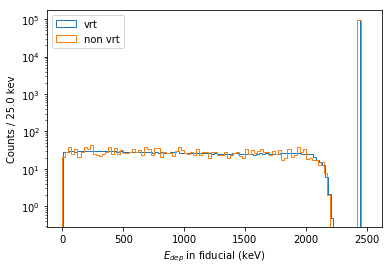

In [62]:
nb=100
plotarray_vrt=plt.hist(df_vrt['de1'],weights=df_vrt['w'],bins=nb,histtype='step')
plotarray_nonvrt=plt.hist(df_nonvrt_cut['de1'],weights=df_nonvrt_cut['w'],bins=nb,range=(0,2500),histtype='step')




plt.yscale('log')
plt.legend(('vrt','non vrt'),loc='upper left')

plt.xlabel('$E_{dep}$ in fiducial (keV)')
plt.ylabel('Counts / '+str(round(plotarray_largefid[1][-1])/nb)+' kev')